In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [20]:
f_root = TFile("../TJPlots/CCpi0hist_dataMCComp_fixFillsSTAT_v3.root")

# itype 1 is cosmic, 2 is neutrino
h1 = f_root.Get("hVtxy_0_0") 
h2 = f_root.Get("hVtxz_0_0") 

#print h1
h1_bnb_v, edgesy = rn.hist2array(h1,return_edges=True)
h2_bnb_v, edgesz = rn.hist2array(h2,return_edges=True)

binsx = (edgesz[0][:-1] + edgesz[0][1:])/2
binsy = (edgesy[0][:-1] + edgesy[0][1:])/2

print h2_bnb_v, edgesy

[  95.  131.  152.  168.  176.  247.  248.  245.  228.  232.  213.  250.
  218.  223.  145.  222.  212.  191.  161.   93.] [array([-120., -108.,  -96.,  -84.,  -72.,  -60.,  -48.,  -36.,  -24.,
        -12.,    0.,   12.,   24.,   36.,   48.,   60.,   72.,   84.,
         96.,  108.,  120.])]


In [38]:
display = np.zeros([len(binsy),len(binsx)])

x_v = []
y_v = []

x_v_nu = []
y_v_nu = []

for i in xrange(binsx.shape[0]):
    yk = h1_bnb_v[i]
    zk = h2_bnb_v[i]
    while yk > 0:
        y_v.append(binsy[i])
        yk -= 1
        
    while zk > 0:    
        x_v.append(binsx[i])
        zk -= 1

y_v = y_v[:-33]
#         k = h2_bnb_v[i][j]
#         while k > 0:
#             y_v_nu.append(binsy[j])
#             x_v_nu.append(binsx[i])
#             k -= 1
print len(x_v), len(y_v)

3850 3850


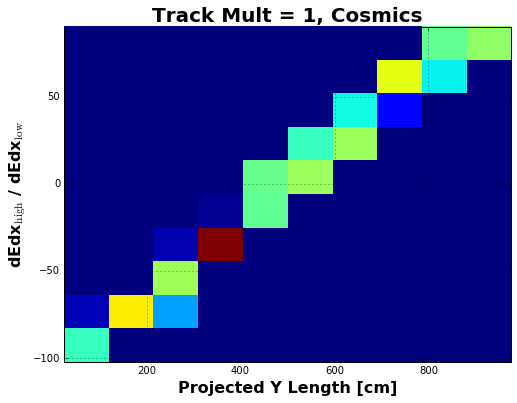

In [39]:
nbins=100

fig = plt.figure(figsize=(8,6))
plt.hist2d(x_v,y_v)#,bins=100)#,norm=LogNorm())
plt.grid(True)
plt.title("Track Mult = 1, Cosmics",fontsize=20,weight='bold')
plt.xlabel("Projected Y Length [cm]",fontsize=16,weight='bold')
plt.ylabel(r'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$',fontsize=16,weight='bold')
#plt.ylim(0,10)
#plt.savefig('Plots/Mult1_dedxratio_v_projylen_Cosmic.png')


In [6]:
# itype 1 is cosmic, 2 is neutrino
h1 = f_root.Get("hCosVsLen_2_1") 
h2 = f_root.Get("hCosVsLen_2_2") 

#print h1
h1_v, edges = rn.hist2array(h1,return_edges=True)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

display = np.zeros([len(binsy),len(binsx)])

x_v = []
y_v = []

x_v_nu = []
y_v_nu = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h1_v[i][j]
        while k > 0:
            y_v.append(binsy[j])
            x_v.append(binsx[i])
            
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            y_v_nu.append(binsy[j])
            x_v_nu.append(binsx[i])
            k -= 1


In [7]:


H, xedges, yedges = np.histogram2d(dedx_ratio_nu,projy_len_nu,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
#plt.hist2d(projy_len,dedx_ratio,bins=100)#,norm=LogNorm())
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Neutrinos",fontsize=20,weight='bold')
plt.xlabel("Projected Y Length [cm]",fontsize=16,weight='bold')
plt.ylabel(r'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$',fontsize=16,weight='bold')
#plt.ylabel("$dEdx_{high}$ / $dEdx_{low}$",fontsize=16)
plt.plot((25, 200), (1.5, 1.5), 'k-',lw=4)
plt.plot((25, 25), (0, 1.5), 'k-',lw=4)
plt.plot((17, 200), (1.5, 1.5), 'r-',lw=4)
plt.plot((17, 17), (0, 1.5), 'r-',lw=4)
plt.ylim(0,10)
plt.savefig('Plots/Mult1_dedxratio_v_projylen_Nu.png')


NameError: name 'dedx_ratio' is not defined

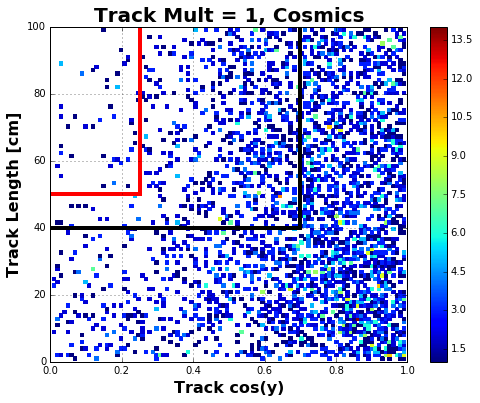

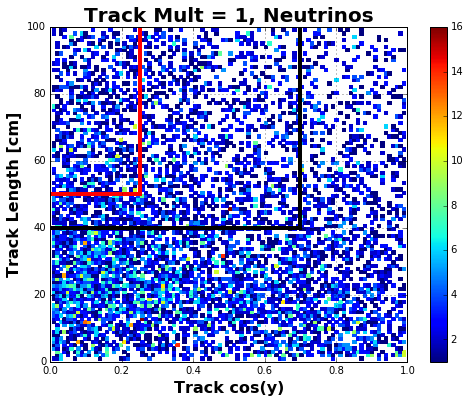

In [10]:
nbins=100

H, xedges, yedges = np.histogram2d(y_v,x_v,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
#plt.hist2d(projy_len,dedx_ratio,bins=100)#,norm=LogNorm())
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Cosmics",fontsize=20,weight='bold')
plt.xlabel("Track cos(y)",fontsize=16,weight='bold')
plt.ylabel("Track Length [cm]",fontsize=16,weight='bold')
plt.plot((0.7, 0.7), (40, 100), 'k-',lw=4)
plt.plot((0,0.7), (40, 40), 'k-',lw=4)
plt.plot((0.25, 0.25), (50, 100), 'r-',lw=4)
plt.plot((0,0.25), (50, 50), 'r-',lw=4)
#plt.axvline(0.4,lw=4,color='r')
plt.savefig('Plots/Mult1_length_v_cosy_Cosmic.png')


H, xedges, yedges = np.histogram2d(y_v_nu,x_v_nu,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Neutrinos",fontsize=20,weight='bold')
plt.xlabel("Track cos(y)",fontsize=16,weight='bold')
plt.ylabel("Track Length [cm]",fontsize=16,weight='bold')
plt.plot((0.7, 0.7), (40, 100), 'k-',lw=4)
plt.plot((0,0.7), (40, 40), 'k-',lw=4)
plt.plot((0.25, 0.25), (50, 100), 'r-',lw=4)
plt.plot((0,0.25), (50, 50), 'r-',lw=4)
#plt.plot((0.35, 0.35), (50, 100), 'r-',lw=4)
#plt.plot((0,0.35), (50, 50), 'r-',lw=4)
#plt.axvline(0.38,lw=4,color='r')
plt.savefig('Plots/Mult1_length_v_cosy_Nu.png')


In [19]:
# itype 1 is cosmic, 2 is neutrino
h1 = f_root.Get("hLongTrackdEdxStartEnd_2_1") 
h2 = f_root.Get("hLongTrackdEdxStartEnd_2_2") 

#print h1
h1_v, edges = rn.hist2array(h1,return_edges=True)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

display = np.zeros([len(binsy),len(binsx)])

x_v = []
y_v = []

x_v_nu = []
y_v_nu = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h1_v[i][j]
        while k > 0:
            y_v.append(binsy[j])
            x_v.append(binsx[i])
            
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            y_v_nu.append(binsy[j])
            x_v_nu.append(binsx[i])
            k -= 1


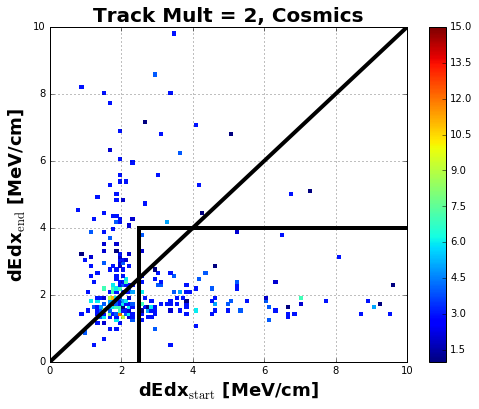

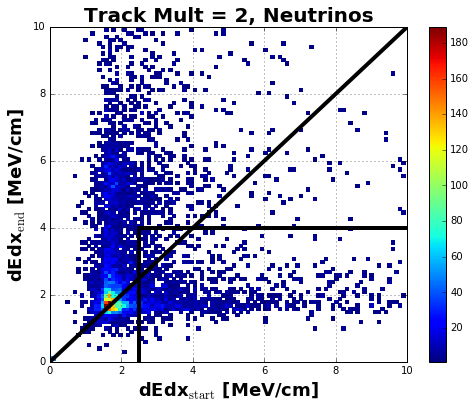

In [20]:
nbins=100

H, xedges, yedges = np.histogram2d(y_v,x_v,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
#plt.hist2d(projy_len,dedx_ratio,bins=100)#,norm=LogNorm())
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 2, Cosmics",fontsize=20,weight='bold')
plt.ylabel("dEdx$_\mathrm{end}$ [MeV/cm]",fontsize=18,weight='bold')
plt.xlabel("dEdx$_\mathrm{start}$ [MeV/cm]",fontsize=18,weight='bold')
plt.plot((2.5, 2.5), (0,4), 'k-',lw=4)
plt.plot((2.5,10), (4, 4), 'k-',lw=4)
plt.plot((0, 10), (0,10), 'k-',lw=4)
plt.xlim(0,10)
plt.savefig('Plots/Mult2_dedx_v_dedx_Cosmic.png')


H, xedges, yedges = np.histogram2d(y_v_nu,x_v_nu,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 2, Neutrinos",fontsize=20,weight='bold')
plt.ylabel("dEdx$_\mathrm{end}$ [MeV/cm]",fontsize=18,weight='bold')
plt.xlabel("dEdx$_\mathrm{start}$ [MeV/cm]",fontsize=18,weight='bold')
plt.plot((2.5, 2.5), (0,4), 'k-',lw=4)
plt.plot((2.5,10), (4, 4), 'k-',lw=4)
plt.plot((0, 10), (0,10), 'k-',lw=4)
plt.xlim(0,10)
plt.savefig('Plots/Mult2_dedx_v_dedx_Nu.png')


In [21]:
# itype 1 is cosmic, 2 is neutrino
h1 = f_root.Get("hCos0VsLen1_2_1") 
h2 = f_root.Get("hCos0VsLen1_2_2") 

#print h1
h1_v, edges = rn.hist2array(h1,return_edges=True)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

display = np.zeros([len(binsy),len(binsx)])

x_v = []
y_v = []

x_v_nu = []
y_v_nu = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h1_v[i][j]
        while k > 0:
            y_v.append(binsy[j])
            x_v.append(binsx[i])
            
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            y_v_nu.append(binsy[j])
            x_v_nu.append(binsx[i])
            k -= 1


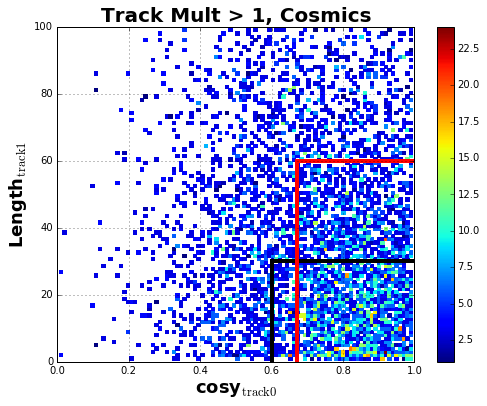

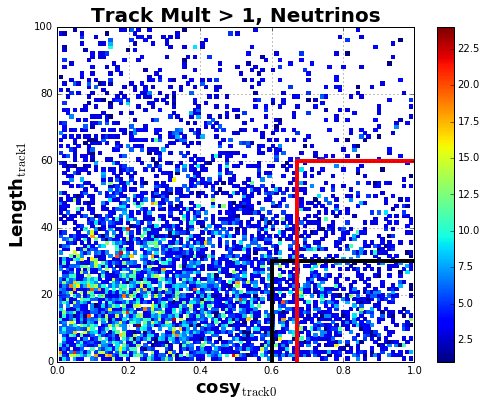

In [22]:
nbins=100

H, xedges, yedges = np.histogram2d(y_v,x_v,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
#plt.hist2d(projy_len,dedx_ratio,bins=100)#,norm=LogNorm())
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult > 1, Cosmics",fontsize=20,weight='bold')
plt.ylabel("Length$_\mathrm{track1}$",fontsize=18,weight='bold')
plt.xlabel("cosy$_\mathrm{track0}$",fontsize=18,weight='bold')
plt.plot((0.6, 0.6), (0,30), 'k-',lw=4)
plt.plot((0.6,1), (30, 30), 'k-',lw=4)
plt.plot((0.67, 0.67), (0,60), 'r-',lw=4)
plt.plot((0.67,1), (60, 60), 'r-',lw=4)
plt.savefig('Plots/Multgt1_Length_v_cosy_Cosmic.png')


H, xedges, yedges = np.histogram2d(y_v_nu,x_v_nu,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult > 1, Neutrinos",fontsize=20,weight='bold')
plt.ylabel("Length$_\mathrm{track1}$",fontsize=18,weight='bold')
plt.xlabel("cosy$_\mathrm{track0}$",fontsize=18,weight='bold')
plt.plot((0.6, 0.6), (0,30), 'k-',lw=4)
plt.plot((0.6,1), (30, 30), 'k-',lw=4)
plt.plot((0.67, 0.67), (0,60), 'r-',lw=4)
plt.plot((0.67,1), (60, 60), 'r-',lw=4)
plt.savefig('Plots/Multgt1_Length_v_cosy_Nu.png')


In [23]:
# itype 1 is cosmic, 2 is neutrino
h1 = f_root.Get("hSingleTrackLengthRatioVsdEdxRatio_2_1") 
h2 = f_root.Get("hSingleTrackLengthRatioVsdEdxRatio_2_2") 

#print h1
h1_v, edges = rn.hist2array(h1,return_edges=True)
h2_v = rn.hist2array(h2)

binsx = (edges[0][:-1] + edges[0][1:])/2
binsy = (edges[1][:-1] + edges[1][1:])/2

display = np.zeros([len(binsy),len(binsx)])

x_v = []
y_v = []

x_v_nu = []
y_v_nu = []

for i in xrange(binsx.shape[0]):
    for j in xrange(binsy.shape[0]):
        k = h1_v[i][j]
        while k > 0:
            y_v.append(binsy[j])
            x_v.append(binsx[i])
            
            k -= 1

        k = h2_v[i][j]
        while k > 0:
            y_v_nu.append(binsy[j])
            x_v_nu.append(binsx[i])
            k -= 1

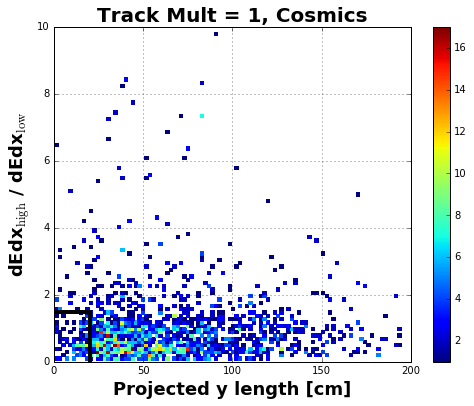

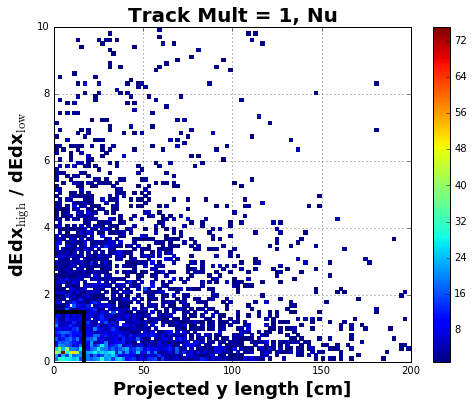

In [24]:
nbins=100

H, xedges, yedges = np.histogram2d(y_v,x_v,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Cosmics",fontsize=20,weight='bold')
plt.xlabel("Projected y length [cm]",fontsize=18,weight='bold')
plt.ylabel("dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$",fontsize=18,weight='bold')
plt.plot((20, 20), (0,1.5), 'k-',lw=4)
plt.plot((0,20), (1.5, 1.5), 'k-',lw=4)
plt.savefig('Plots/Multgt1_projLength_v_dedxRatio_Cosmic.png')


H, xedges, yedges = np.histogram2d(y_v_nu,x_v_nu,bins=nbins)
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

fig = plt.figure(figsize=(8,6))
plt.pcolormesh(yedges,xedges,Hmasked)
plt.grid(True)#,color='k',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Nu",fontsize=20,weight='bold')
plt.xlabel("Projected y length [cm]",fontsize=18,weight='bold')
plt.ylabel("dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$",fontsize=18,weight='bold')
plt.savefig('Plots/Multgt1_projLength_v_dedxRatio_Nu.png')
plt.plot((17, 17), (0,1.5), 'k-',lw=4)
plt.plot((0,17), (1.5, 1.5), 'k-',lw=4)


In [25]:
# itype 1 is cosmic, 2 is neutrino, 0 is all
h0 = f_root.Get("hMul_2_0") 
h1 = f_root.Get("hMul_2_1") 
h2 = f_root.Get("hMul_2_2") 

#print h1
h0_v, edges = rn.hist2array(h0,return_edges=True)
h1_v = rn.hist2array(h1)
h2_v = rn.hist2array(h2)

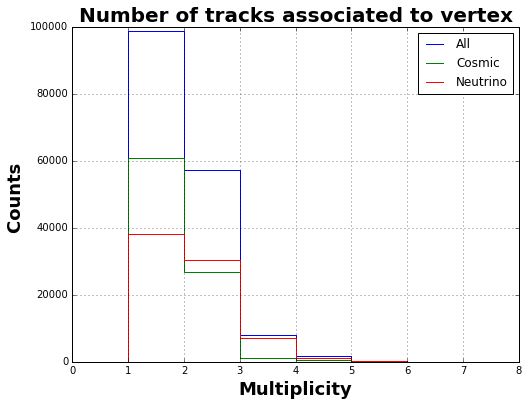

In [72]:
left, right = edges[0][:-1], edges[0][1:]
X = np.array([left,right]).T.flatten()
Y0 = np.array([h0_v,h0_v]).T.flatten()
Y1 = np.array([h1_v,h1_v]).T.flatten()
Y2 = np.array([h2_v,h2_v]).T.flatten()

fig = plt.figure(figsize=(8,6))
plt.plot(X,Y0,'b-',label='All')
plt.plot(X,Y1,'g-',label='Cosmic')
plt.plot(X,Y2,'r-',label='Neutrino')
plt.grid(True)#,color='k',lw=3)
plt.title("Number of tracks associated to vertex",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Multiplicity",fontsize=18,weight='bold')
plt.legend()
plt.xlim(0,8)
plt.savefig('Plots/mult.png')

In [29]:
# itype 1 is cosmic, 2 is neutrino, 0 is all 
h0 = f_root.Get("hCos3_2_1") 
h1 = f_root.Get("hCos3_2_2") 

#print h1
h0_v = rn.hist2array(h0)
h1_v = rn.hist2array(h1)

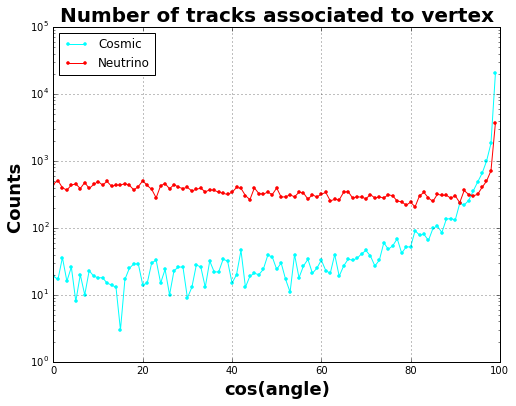

In [32]:
plt.figure(figsize=(8,6))
plt.plot(h0_v,color='cyan',label='Cosmic',marker='.')
plt.plot(h1_v,'r-',label='Neutrino',marker='.')
plt.grid(True)#,color='k',lw=3)
plt.title("Number of tracks associated to vertex",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("cos(angle)",fontsize=18,weight='bold')
plt.legend(loc=2)
plt.yscale('log')
#plt.savefig('Plots/mult.png')

In [33]:
h0 = f_root.Get("hCos3_2_1") 
h1 = f_root.Get("hCos3_2_2") 

#print h1
h0_v, edges = rn.hist2array(h0,return_edges=True)
h1_v = rn.hist2array(h1)

left, right = edges[0][:-1], edges[0][1:]
X = np.array([left,right]).T.flatten()
Y1 = np.array([h0_v,h0_v]).T.flatten()
Y2 = np.array([h1_v,h1_v]).T.flatten()


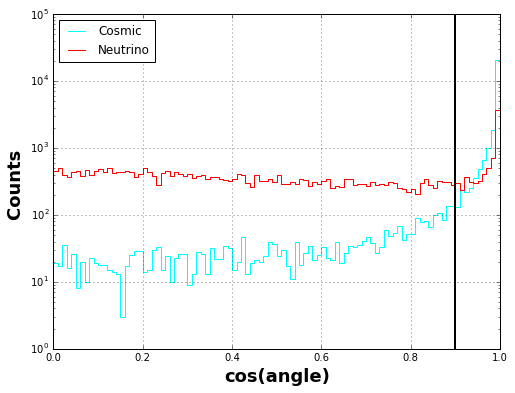

In [35]:

fig = plt.figure(figsize=(8,6))
plt.plot(X,Y1,color='cyan',label='Cosmic')
plt.plot(X,Y2,'r-',label='Neutrino')
#plt.hist([h0_v,h1_v], edges[0][:-1], stacked=True, normed = True)
plt.grid(True)#,color='k',lw=3)
#plt.title("Number of tracks associated to vertex",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("cos(angle)",fontsize=18,weight='bold')
plt.yscale('log')
#plt.ylim(0,2000)
plt.axvline(0.9,lw=2,color='k')
plt.legend(loc=2)
plt.savefig('Plots/cosangle.png')

Line2D(Neutrino)


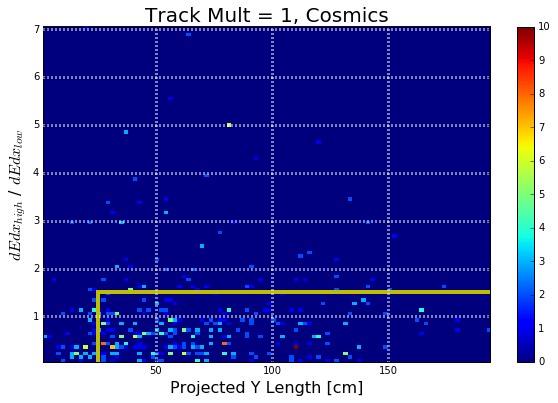

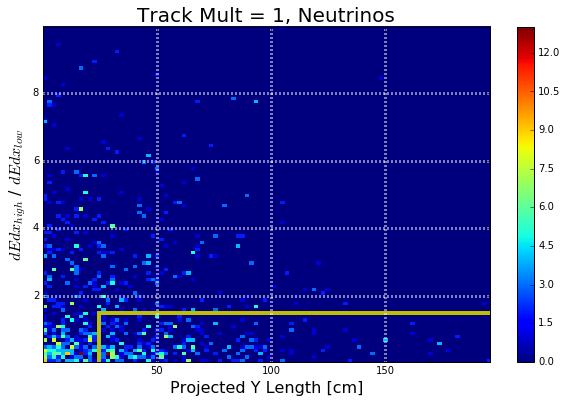

In [99]:
fig = plt.figure(figsize=(10,6))
plt.subplot('111', axisbg='white')
plt.hist2d(projy_len,dedx_ratio,bins=100)#,norm=LogNorm())
plt.grid(True,color='w',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Cosmics",fontsize=20)
plt.xlabel("Projected Y Length [cm]",fontsize=16)
plt.ylabel("$dEdx_{high}$ / $dEdx_{low}$",fontsize=16)
plt.plot((25, 200), (1.5, 1.5), 'y-',lw=4)
plt.plot((25, 25), (0, 1.5), 'y-',lw=4)
#plt.ylim(0,8)

plt.figure(figsize=(10,6))
plt.hist2d(projy_len_nu,dedx_ratio_nu,bins=100)#,'bo')
plt.plot((25, 200), (1.5, 1.5), 'y-',lw=4)
plt.plot((25, 25), (0, 1.5), 'y-',lw=4)
plt.grid(True,color='w',lw=3)
plt.colorbar()
plt.title("Track Mult = 1, Neutrinos",fontsize=20)
plt.xlabel("Projected Y Length [cm]",fontsize=16)
plt.ylabel("$dEdx_{high}$ / $dEdx_{low}$",fontsize=16)
#plt.ylim(0,12)


In [12]:
#print h1_v
#for i in h1_v:
#    print i
#print edges[0]

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163.  1

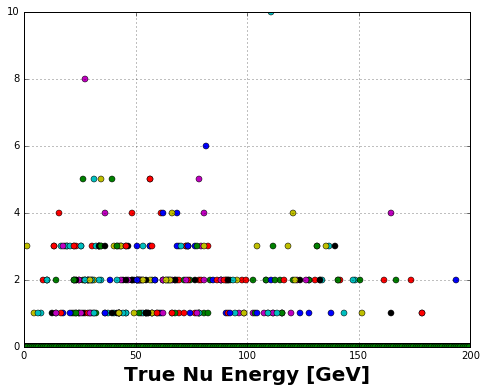

In [5]:
plt.figure(figsize=(8,6))
plt.plot(bins,h1_v,'o')#,'k-',label='Before',lw=1,marker='o')
#plt.plot(bins,h2_v,'r-',label='After',lw=1,marker='o')
plt.grid(True)
plt.xlabel('True Nu Energy [GeV]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.7,0.9))
#plt.ylim(-0.1,4.)


In [ ]:
def extents(f):
  delta = f[1] - f[0]
  return [f[0] - delta/2, f[-1] + delta/2]

plt.figure(figsize=(8,6))
#plt.imshow(h1_v) #, aspect='auto', interpolation='none',
           #extent=extents(edges[0]) + extents(edges[1]), origin='lower')
plt.hist2d(projy_len,dedx_ratio,bins=60)#,'bo')
#plt.hist2d(true_e,reco_e,bins=50,\
#           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.grid(True,color='w',lw=3)
plt.xlabel("Projected Y Length [cm]",fontsize=20)
plt.ylabel("$dEdx_{high}$ / $dEdx_{low}$",fontsize=20)
